# Homework Unsupervised Learning by Logicaldata
# **Airline Customer Value Analysis Case**
___

![Data Description](https://drive.google.com/uc?export=view&id=1BdpAul5HnUCGd3_PHVHxyNxe6H5R7qt4)

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df_1 = df.copy() # Copy dataframe asli

In [ ]:
date_time = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
nums = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END',  'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

In [ ]:
# Saat mengubah tipe data menjadi datetime terdapat error
# Ternyata ditemukan nilai tanggal tidak valid pada kolom LAST_FLIGHT_DATE
df_1[df_1['LAST_FLIGHT_DATE'].str.contains('2014/2/29')].shape[0] # mencari ada berapa row yang terdapat value error '2014/2/29'

421

In [ ]:
value_error = df_1[df_1['LAST_FLIGHT_DATE'].str.contains('2014/2/29')]
percentage_error = round(value_error.shape[0]/len(df_1),3)
print('Presentase value error pada data :', percentage_error,'%')

Presentase value error pada data : 0.007 %


>Karena jumlah data yang tidak valid sangat kecil, maka dapat kita drop

In [ ]:
df_1.drop(value_error.index, inplace=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62567 non-null  int64  
 1   FFP_DATE           62567 non-null  object 
 2   FIRST_FLIGHT_DATE  62567 non-null  object 
 3   GENDER             62564 non-null  object 
 4   FFP_TIER           62567 non-null  int64  
 5   WORK_CITY          60312 non-null  object 
 6   WORK_PROVINCE      59341 non-null  object 
 7   WORK_COUNTRY       62542 non-null  object 
 8   AGE                62148 non-null  float64
 9   LOAD_TIME          62567 non-null  object 
 10  FLIGHT_COUNT       62567 non-null  int64  
 11  BP_SUM             62567 non-null  int64  
 12  SUM_YR_1           62016 non-null  float64
 13  SUM_YR_2           62429 non-null  float64
 14  SEG_KM_SUM         62567 non-null  int64  
 15  LAST_FLIGHT_DATE   62567 non-null  object 
 16  LAST_TO_END        625

## Handling Missing Values

In [ ]:
# Hitung missing values
for i in df_1.columns:
    percentage_of_null_values = round((df_1[i].isnull().sum())*100/len(df_1),3)
    if df[i].isnull().sum() > 0:
        print(i)
        print('Jumlah missing value:', df_1[i].isnull().sum())
        print('Tipe data :', df_1[i].dtypes)
        print('Presentase missing values:', percentage_of_null_values ,'%')
        print()
        print()

GENDER
Jumlah missing value: 3
Tipe data : object
Presentase missing values: 0.005 %


WORK_CITY
Jumlah missing value: 2255
Tipe data : object
Presentase missing values: 3.604 %


WORK_PROVINCE
Jumlah missing value: 3226
Tipe data : object
Presentase missing values: 5.156 %


WORK_COUNTRY
Jumlah missing value: 25
Tipe data : object
Presentase missing values: 0.04 %


AGE
Jumlah missing value: 419
Tipe data : float64
Presentase missing values: 0.67 %


SUM_YR_1
Jumlah missing value: 551
Tipe data : float64
Presentase missing values: 0.881 %


SUM_YR_2
Jumlah missing value: 138
Tipe data : float64
Presentase missing values: 0.221 %




Null values dengan presentase dibawah 1% akan di-drop karena sedikit. Sedangkan kolom dengan null value >3% selanjutnya akan dilakukan imputasi data yaitu: WORK_CITY dan WORK_PROVINCE.

In [ ]:
df_1[cats].describe().T

,count,unique,top,freq
GENDER,62564,2,Male,47806
WORK_CITY,60312,3225,guangzhou,9326
WORK_PROVINCE,59341,1161,guangdong,17395
WORK_COUNTRY,62542,118,CN,57347


WORK_CITY dan WORK_PROVINCE akan di-imputasi menggunakan nilai modus (most frequent) dari kolom tersebut.

In [ ]:
cols = ['WORK_CITY', 'WORK_PROVINCE']
df_1[cols] = df_1[cols].fillna(df_1[cols].mode().iloc[0])

In [ ]:
#Drop missing value dibawah 1%
df_1.dropna(axis=0, inplace=True)

In [ ]:
# Cek missing value
df_1.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61437 non-null  int64  
 1   FFP_DATE           61437 non-null  object 
 2   FIRST_FLIGHT_DATE  61437 non-null  object 
 3   GENDER             61437 non-null  object 
 4   FFP_TIER           61437 non-null  int64  
 5   WORK_CITY          61437 non-null  object 
 6   WORK_PROVINCE      61437 non-null  object 
 7   WORK_COUNTRY       61437 non-null  object 
 8   AGE                61437 non-null  float64
 9   LOAD_TIME          61437 non-null  object 
 10  FLIGHT_COUNT       61437 non-null  int64  
 11  BP_SUM             61437 non-null  int64  
 12  SUM_YR_1           61437 non-null  float64
 13  SUM_YR_2           61437 non-null  float64
 14  SEG_KM_SUM         61437 non-null  int64  
 15  LAST_FLIGHT_DATE   61437 non-null  object 
 16  LAST_TO_END        614

## Koreksi Tipe data

In [ ]:
#convert date_time yang bertipe 'object' menjadi tipe data 'datetime'
df_1[date_time] = df_1[date_time].apply(pd.to_datetime)

#convert 'AGE' menjadi integer
df_1['AGE'] = df_1['AGE'].astype(int)

df_1.dtypes

MEMBER_NO                     int64
FFP_DATE             datetime64[ns]
FIRST_FLIGHT_DATE    datetime64[ns]
GENDER                       object
FFP_TIER                      int64
WORK_CITY                    object
WORK_PROVINCE                object
WORK_COUNTRY                 object
AGE                           int32
LOAD_TIME            datetime64[ns]
FLIGHT_COUNT                  int64
BP_SUM                        int64
SUM_YR_1                    float64
SUM_YR_2                    float64
SEG_KM_SUM                    int64
LAST_FLIGHT_DATE     datetime64[ns]
LAST_TO_END                   int64
AVG_INTERVAL                float64
MAX_INTERVAL                  int64
EXCHANGE_COUNT                int64
avg_discount                float64
Points_Sum                    int64
Point_NotFlight               int64
dtype: object

In [ ]:
# Memasukkan date_time sebagai data categorical
for x in date_time:
  cats.append(x)
  print(cats)

['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE']
['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE']
['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME']
['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']


In [ ]:
df_1[cats].columns

Index(['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE',
       'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')

In [ ]:
df_1[cats].describe().T

,count,unique,top,freq,first,last
GENDER,61437,2,Male,46972,NaT,NaT
WORK_CITY,61437,3189,guangzhou,11406,NaT,NaT
WORK_PROVINCE,61437,1149,guangdong,20331,NaT,NaT
WORK_COUNTRY,61437,117,CN,56333,NaT,NaT
FFP_DATE,61437,3067,2011-01-13 00:00:00,182,2004-11-01,2013-03-31
FIRST_FLIGHT_DATE,61437,3404,2013-02-16 00:00:00,92,1905-12-31,2015-05-30
LOAD_TIME,61437,1,2014-03-31 00:00:00,61437,2014-03-31,2014-03-31
LAST_FLIGHT_DATE,61437,730,2014-03-31 00:00:00,956,2012-04-01,2014-03-31


## Duplicated Data

In [ ]:
df_1.duplicated().sum()

0

## Handling Outlier

Dalam melakukan segmentasi menggunakan metode K-means Clustering, penting untuk dilakukan handling oulier karena Metode K-Means Clustering sangat sensitif terhadap outlier.

In [ ]:
df_1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,61437.0,31486.068346,18185.683471,2.0,15724.000000,31473.000000,47249.000000,62988.0
FFP_TIER,61437.0,4.103260,0.375856,4.0,4.000000,4.000000,4.000000,6.0
AGE,61437.0,42.496281,9.888107,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,61437.0,11.939776,14.118982,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,61437.0,11023.455312,16407.296822,0.0,2584.000000,5780.000000,12942.000000,505308.0
SUM_YR_1,61437.0,5371.931577,8131.393893,0.0,1020.000000,2811.000000,6590.000000,239560.0
SUM_YR_2,61437.0,5647.021518,8707.188825,0.0,820.000000,2808.000000,6890.000000,234188.0
SEG_KM_SUM,61437.0,17276.042710,21054.585569,368.0,4849.000000,10149.000000,21431.000000,580717.0
LAST_TO_END,61437.0,173.565880,181.477696,1.0,28.000000,107.000000,262.000000,731.0
AVG_INTERVAL,61437.0,68.182230,77.774203,0.0,23.714286,45.000000,82.500000,728.0


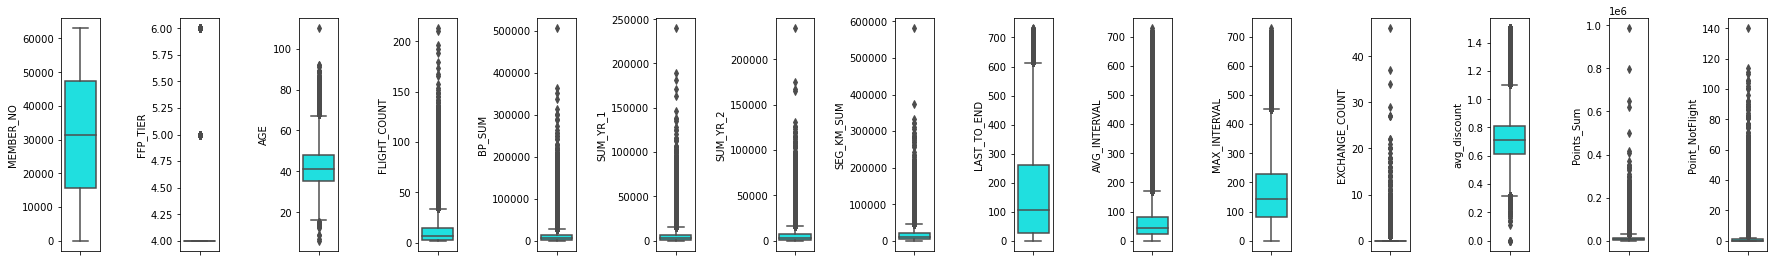

In [ ]:
plt.figure(figsize=(25,4))

for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_1[nums[i]], color='cyan', orient='h')
    plt.tight_layout(pad = 2)

- Hanya kolom MEMBER_NO dan FFP_TIER yang tidak memiliki outlier.
- Kolom SUM_YR_1, SUM_YR_2, avg_discount memiliki nilai 0. Seharusnya tidak nol. Hal ini kami identifikasi sebagai anomali.
- Kolom AGE memiliki outlier yaitu ada penumpang berumur 110 tahun. Termasuk anomali juga dan harus di-drop

In [ ]:
# Mencari banyaknya value anomali
df_1[(df_1['SUM_YR_1']==0) & (df_1['SUM_YR_2']==0) & (df_1['avg_discount']==0)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29,2014-03-31,...,0.0,6138,2012-09-21,558,12.0,12,0,0.0,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42,2014-03-31,...,0.0,2158,2013-10-06,178,3.0,3,0,0.0,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35,2014-03-31,...,0.0,3848,2013-01-20,437,0.0,0,0,0.0,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25,2014-03-31,...,0.0,1134,2013-06-09,297,4.0,4,1,0.0,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38,2014-03-31,...,0.0,8016,2014-01-03,89,37.0,60,14,0.0,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43,2014-03-31,...,0.0,2594,2014-03-03,29,166.0,166,0,0.0,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36,2014-03-31,...,0.0,3934,2013-02-26,400,12.0,12,0,0.0,0,0


In [ ]:
# Simpan kolom yang berisi data anomali ke dalam dataframe baru.
anomali_col = df_1[(df_1['SUM_YR_1']==0) & (df_1['SUM_YR_2']==0) & (df_1['avg_discount']==0)]
# Drop value anomali tersebut

df_1.drop(anomali_col.index, inplace=True)

In [ ]:
# Drop pelanggan dengan umur 110

df_1.drop((df_1[df_1['AGE']>100]).index, inplace=True)

In [ ]:
#Dataframe setelah dilakukan pembersihan data anomali
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61429 entries, 0 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61429 non-null  int64         
 1   FFP_DATE           61429 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61429 non-null  datetime64[ns]
 3   GENDER             61429 non-null  object        
 4   FFP_TIER           61429 non-null  int64         
 5   WORK_CITY          61429 non-null  object        
 6   WORK_PROVINCE      61429 non-null  object        
 7   WORK_COUNTRY       61429 non-null  object        
 8   AGE                61429 non-null  int32         
 9   LOAD_TIME          61429 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61429 non-null  int64         
 11  BP_SUM             61429 non-null  int64         
 12  SUM_YR_1           61429 non-null  float64       
 13  SUM_YR_2           61429 non-null  float64       
 14  SEG_KM

In [ ]:
# Handle Otlier menggunakan Zscore
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier : {len(df_1)}')

filtered_entries = np.array ([True] * len(df_1))

for col in df_1[nums]:
  zscore = abs(stats.zscore(df_1[col]))
  filtered_entries = (zscore < 3)

df_1_filtered = df_1[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier : {len(df_1_filtered)}')

Jumlah baris sebelum memfilter outlier : 61429
Jumlah baris setelah memfilter outlier : 59291


In [ ]:
# Distribusi data numerical setelah handling outlier
def distribution (kolom):
    f, (p1, p2) = plt.subplots(2, sharex = True)
    sns.distplot(df_1_filtered[kolom], ax = p1, color = "orange")
    sns.boxplot(df_1_filtered[kolom], ax = p2, color = "orange")

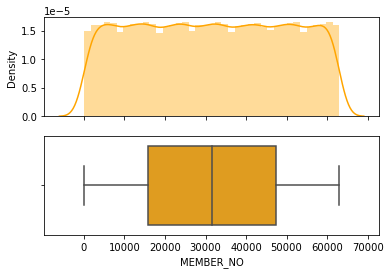

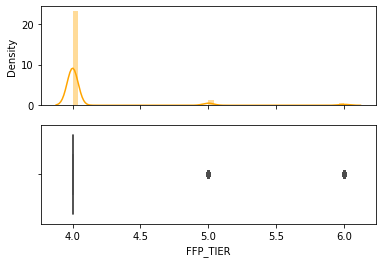

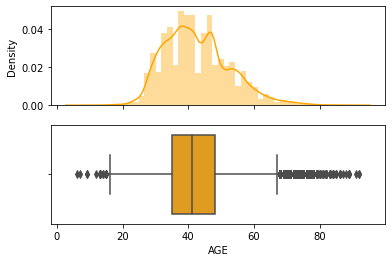

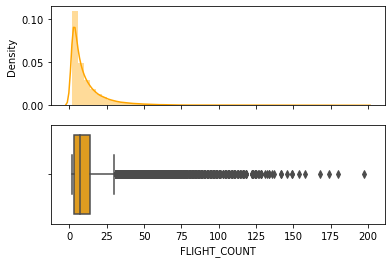

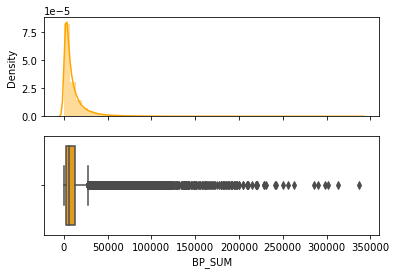

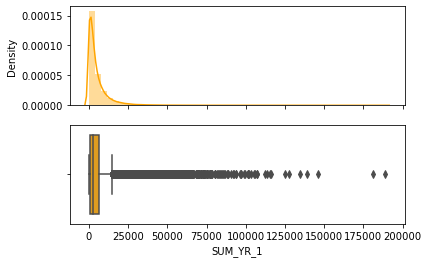

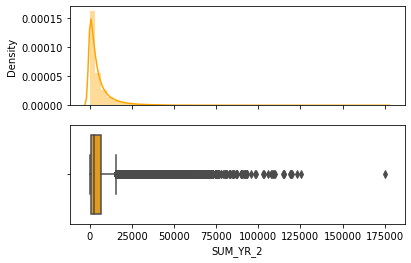

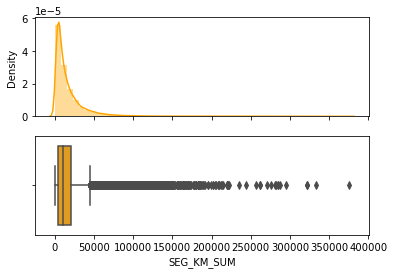

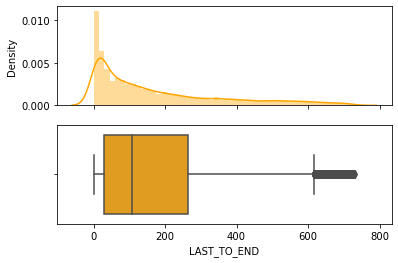

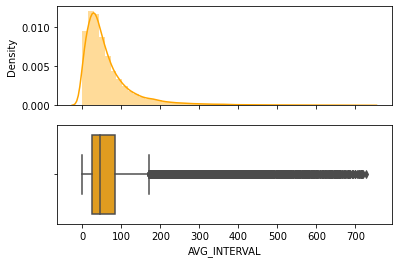

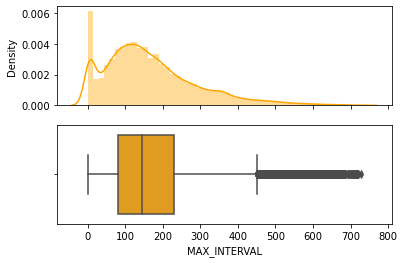

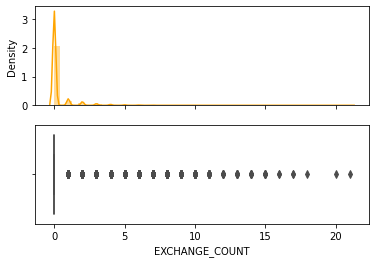

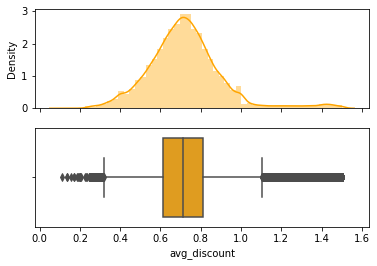

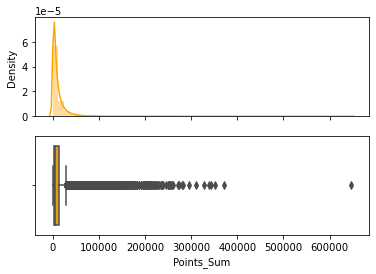

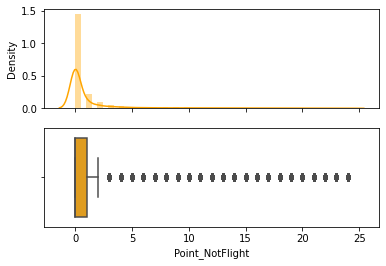

In [ ]:
for i in df_1_filtered[nums].columns:
    distribution(i)
    


- Kolom 'MEMBER_NO', 'AGE', dan 'avg_discount' berdistribusi normal
- Kolom lainnya menunjukkan Skew positive (menceng ke kanan)
- Kolom 'FFP_TIER' merupakan kategorikal berbentuk numerik.

<AxesSubplot:>

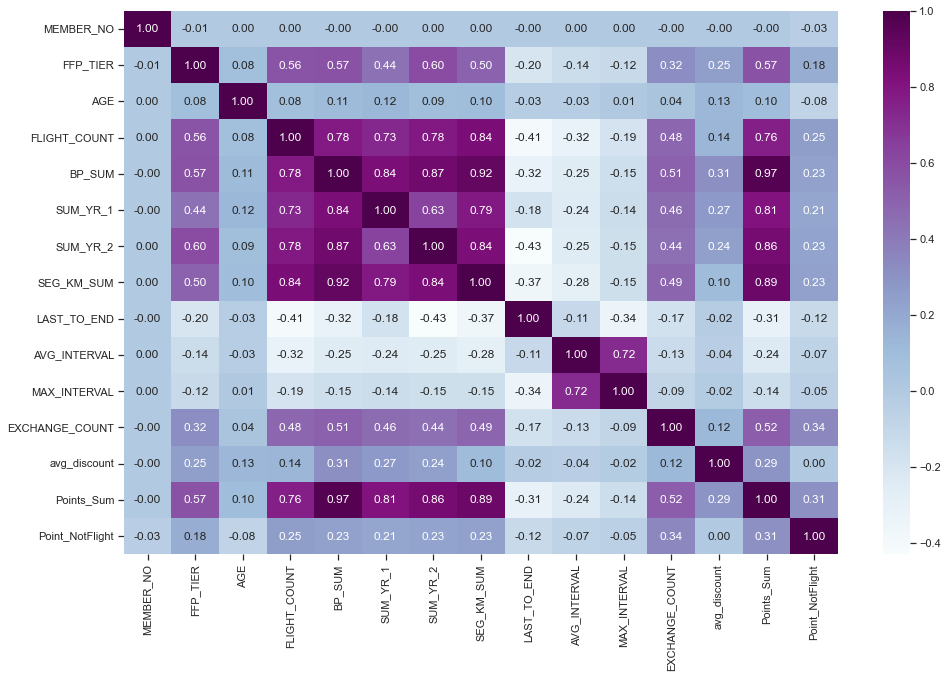

In [ ]:
# Nilai korelasi antar fitur
corr_= df_1_filtered.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

# Feature Engineering & Feature Selection

![RFM Metrics](https://drive.google.com/uc?export=view&id=1UV-lhb6P67eunt6xPlKpTsOJtqiFTPk1)

Metrics terpenting dalam suatu bisnis adalah RFM.
- Recency : 'LAST_TO_END' (Jarak waktu kapan terakhir kali melakukan pemesanan tiket/penerbangan termutakhir)
- Frequency : 'FLIGHT_COUNT' (Frekuensi penerbangan yang telah dilakukan)
- Monetary : 'SEG_KM_SUM' (Total kilometer penerbangan. Semakin tinggi km terbang, semakin banyak money spent)
- Other feature : avg_discount (rata-rata diskon yang didapat customer)

In [ ]:
df_1_filtered.reset_index()

,index,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
1,5,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
2,7,22631,2010-04-09,2010-04-09,Female,6,wenzhoushi,zhejiang,CN,50,...,114971.0,287230,2014-03-29,3,10.111111,45,7,0.962070,351198,14
3,8,32197,2011-06-07,2011-07-01,Male,5,DRANCY,guangdong,FR,50,...,87401.0,321489,2014-03-26,6,13.054545,94,5,0.828478,295158,7
4,9,31645,2010-07-05,2010-07-05,Female,6,wenzhou,zhejiang,CN,43,...,60267.0,375074,2014-03-17,15,11.333333,73,13,0.708010,251907,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59286,62974,11163,2005-05-08,2005-08-26,Male,4,guangzhou,guangdong,CN,34,...,960.0,368,2014-01-03,89,70.000000,70,0,0.710000,900,1
59287,62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,guangdong,TW,38,...,910.0,368,2013-12-02,121,2.000000,2,0,0.670000,400,0
59288,62976,10380,2010-07-08,2011-06-21,Male,4,guiyangshi,guizhousheng,CN,33,...,0.0,1062,2014-02-22,39,420.000000,420,1,0.225000,213,1
59289,62977,16372,2012-12-20,2012-12-20,Male,4,taoyuan,guangdong,TW,47,...,0.0,904,2012-12-24,464,4.000000,4,0,0.250000,0,0


In [ ]:
# Simpan fitur yang dipilih
feature_selected = df_1_filtered[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

# Scaling (Standarization)

Sebelum melakukan K-Means modeling perlu dilakukan standardisasi agar distribusi nilai masing-masing fitur menjadi seragam

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_data = StandardScaler()
data_std = sc_data.fit_transform(feature_selected.astype(float))

In [ ]:
new_df = pd.DataFrame(data = data_std, columns = feature_selected.columns)
new_df.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,5.929100e+04,5.929100e+04,5.929100e+04,5.929100e+04
mean,2.114712e-15,9.930632e-14,-1.409832e-15,-7.366783e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-9.584618e-01,-7.171816e-01,-8.213319e-01,-3.292235e+00
25%,-7.993173e-01,-6.418554e-01,-5.992388e-01,-5.910115e-01
50%,-3.657858e-01,-3.405504e-01,-3.407444e-01,-5.497062e-02
75%,4.903017e-01,1.867333e-01,2.084590e-01,4.717634e-01
max,3.047589e+00,1.397144e+01,1.796625e+01,4.192853e+00


# Modeling

## Inertia

Menetukan inertia dengan elbow method dengan harapan mendapatkan banyaknya cluster yang tepat

<AxesSubplot:>

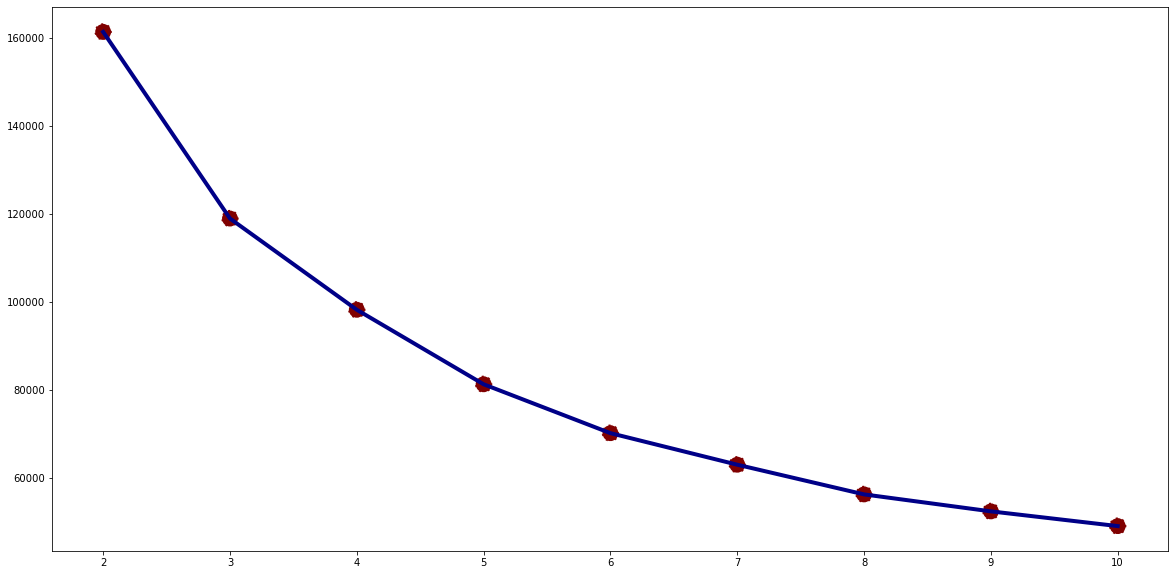

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)
     
    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

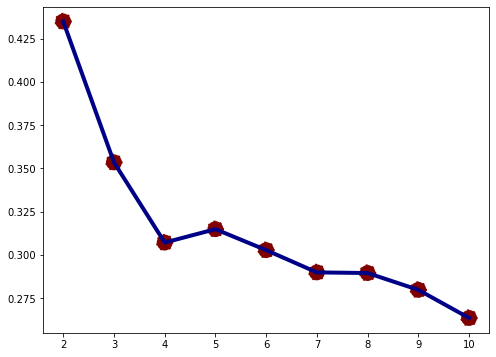

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Berdasarkan hasil inertia dan silhouette score yang diperoleh, maka didapat banyaknya cluster yang dipakai dalam K-means Clustering, yaitu 3 cluster.

## Create Clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(new_df)

In [ ]:
new_df['clusters'] = kmeans.labels_

In [ ]:
new_df.sample(5)

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,clusters
47541,1.993943,-0.641855,-0.619771,-0.558427,2
48555,0.023844,-0.641855,-0.602322,-0.991876,0
25307,-0.239568,0.036081,-0.159490,-0.462961,0
46454,-0.799317,-0.566529,-0.455514,-1.855008,0
16997,-0.903584,0.789343,0.085191,0.017142,0


## PCA

Dengan metode PCA kita akan melihat visualisasi clustering dengan mudah secara 2 dimensi.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(new_df)
pcs = pca.transform(new_df)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = new_df['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,8.445773,5.483066,1
1,11.835979,7.154213,1
2,10.995673,6.326332,1
3,11.136099,6.279995,1
4,12.923226,7.223918,1


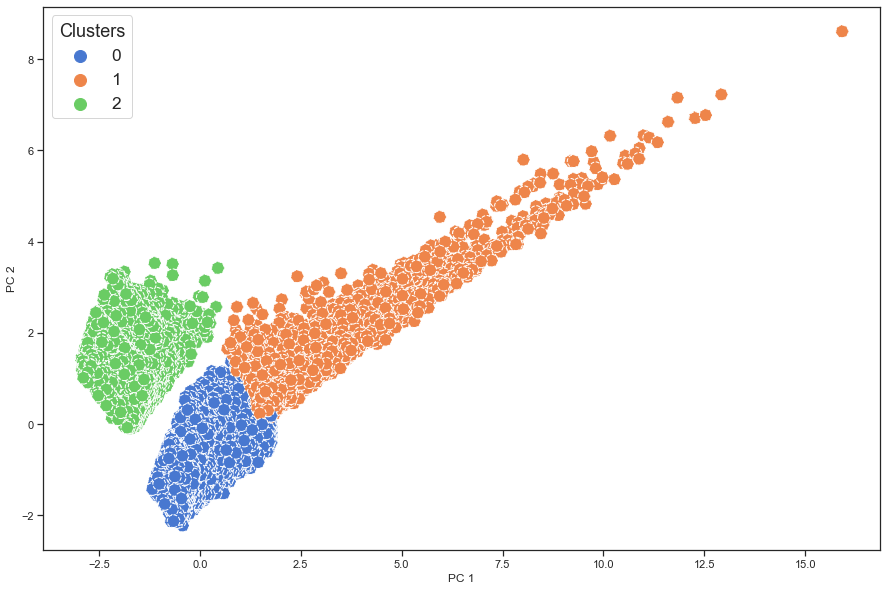

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_theme(style="ticks")

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    palette="muted",
    data=data_pca,
    s=160,
    ax=ax
)

plt.legend(title='Clusters', fontsize='x-large', title_fontsize='18', markerscale=2)

Dari model yang dihasilkan, Cluster dapat tersegmentasi dengan baik. Akan tetapi terdapat data point yang memiliki nilai PC1 & PC2 tertinggi dan jauh dari kumpulan data. Hal tersebut kemungkinan masih terdapat outlier atau perlu penambahan fitur baru yang berkorelasi.

## Insight

In [ ]:
df2 = feature_selected.copy()

In [ ]:
df2['clusters'] = new_df['clusters']

In [ ]:
df2.groupby(['clusters']).agg(['mean','median'])

LAST_TO_END        FLIGHT_COUNT           SEG_KM_SUM           \
                mean median         mean median          mean   median   
clusters                                                                 
0.0       163.056753  103.0    10.350789    8.0  14529.648712  11753.0   
1.0        44.697987   18.0    37.882215   34.0  60303.553691  52427.0   
2.0       229.134866  171.0     5.525999    4.0   7429.933319   5430.5   

         avg_discount            
                 mean    median  
clusters                         
0.0          0.728396  0.715741  
1.0          0.825088  0.764466  
2.0          0.699081  0.692558

In [ ]:
df2['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,0.0,36016
1,2.0,13962
2,1.0,5960


**Cluster 0 (Kalangan Menengah):**
- Memiliki jumlah member paling banyak
- Jumlah recency penerbangan level menengah
- Jumlah frekuensi penerbangan level menengah
- Jumlah total km level menengah
- Rata-rata diskon level menengah
>Business recomendation : Merupakan customer potensial. Berikan diskon yang lebih menarik agar menjaga retensi customer, dengan harapan agar customer dalam cluster ini dapat meningkatkan jumlah transaksinya.

<br/>

**Cluster 1 (Kalangan Atas/Prioritas) :**

- Memiliki jumlah member paling kecil
- Jumlah recency penerbangan paling kecil
- Jumlah frekuensi penerbangan paling sering
- Jumlah total km tertinggi
- Rata-rata diskon paling tinggi
> Business recomendation : Customer dalam cluster ini adalah customer paling loyal. Harus diberikan treatment special karena mereka adalah yang paling berjasa dalam menghasilkan revenue paling besar.

<br/>

**Cluster 2 (Kalangan Bawah) :**

- Memiliki jumlah member menengah
- Jumlah recency penerbangan paling tinggi
- Jumlah frekuensi penerbangan paling sedikit/jarang
- Jumlah total km paling kecil
- Rata-rata diskon paling kecil
> Business recomendation : Diperlukan perhatian lebih terhadap jenis customer ini. Dibutuhkan strategi marketing tertentu untuk meningkatkan interaksi dengan customer dalam cluster ini.

## Cluster dari Dataset Asli berdasarkan ('FFP_TIER')

In [ ]:
df_tier = data_pca.copy()

In [ ]:
df_tier['clusters'] = df_1_filtered['FFP_TIER']
df_tier.sample(5)

,PC 1,PC 2,clusters
46403,-2.290223,1.593015,4.0
51483,-2.284647,1.812657,4.0
1189,2.950341,1.309438,4.0
41400,-0.516842,-0.890316,4.0
27037,-1.745939,1.823636,4.0


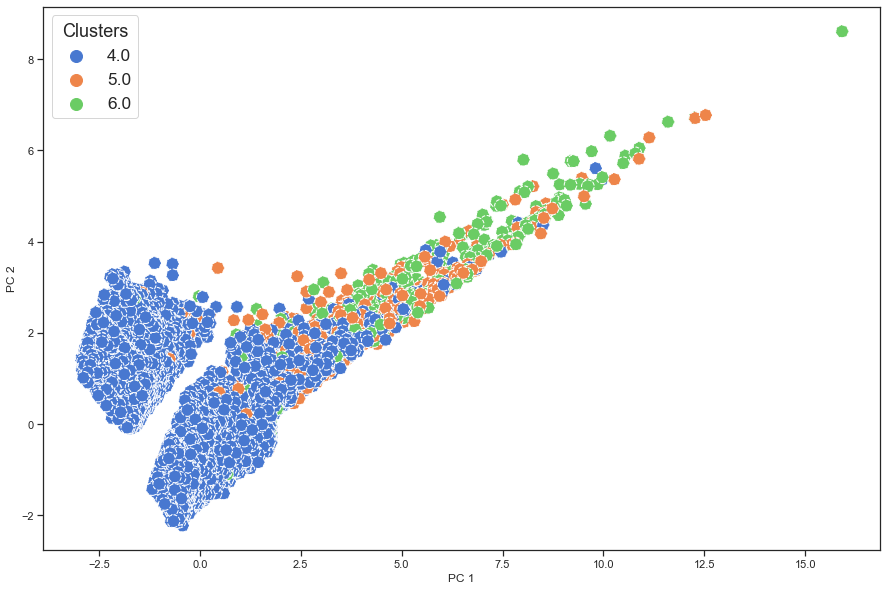

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set_theme(style="ticks")

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    palette="muted",
    data=df_tier,
    s=160,
    ax=ax
)

plt.legend(title='Clusters', fontsize='x-large', title_fontsize='18', markerscale=2)

Terlihat jika menggunakan segmentasi default dari dataset asli (kolom 'FFP_TIER'). Cluster tidak dapat tersegmentasi dengan baik.